<a href="https://colab.research.google.com/github/motamaike/Soja-Milho-Regi-o-Sul-IBGE-/blob/master/Agro_API_Banco_Central_do_Brasil_Python_para_Investimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dados Agronegócio

# Importando Bibliotecas

In [ ]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['figure.figsize'] = (17,8)

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
print(__version__)

4.4.1


In [ ]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Obtendo Dados através da API do Banco Central do Brasil

In [ ]:
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df

# Exemplo de Consultas à API do Banco Central do Brasil

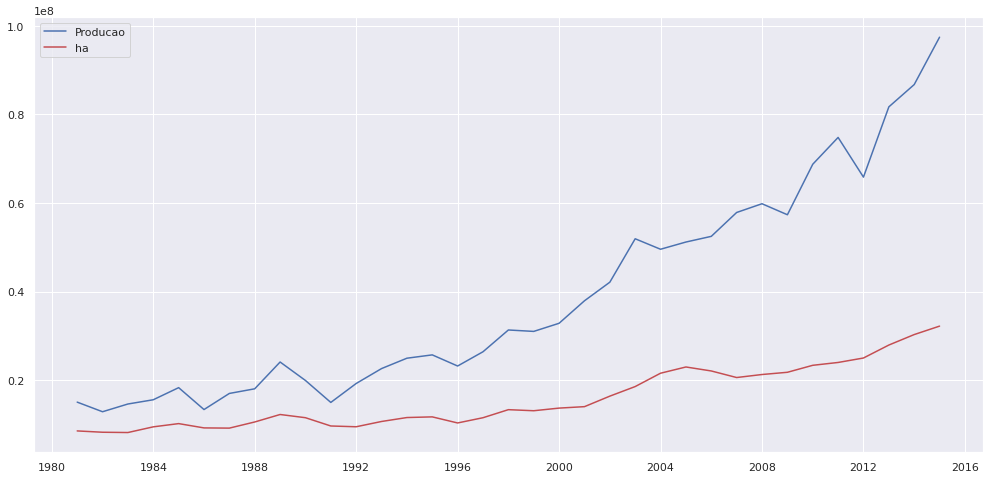

In [ ]:
soja = consulta_bc(1273)
a_soja = consulta_bc(1295)
soja = soja[soja.index >= '1900-01-01']
a_soja = a_soja[a_soja.index >= '1900-01-01']

fig, ax = plt.subplots()

ax.plot(soja, label= 'Producao')
ax.plot(a_soja, color='r', label = 'ha')
ax.legend()

In [ ]:
prod_ha_soja = soja/a_soja

prod_ha_soja.iplot()

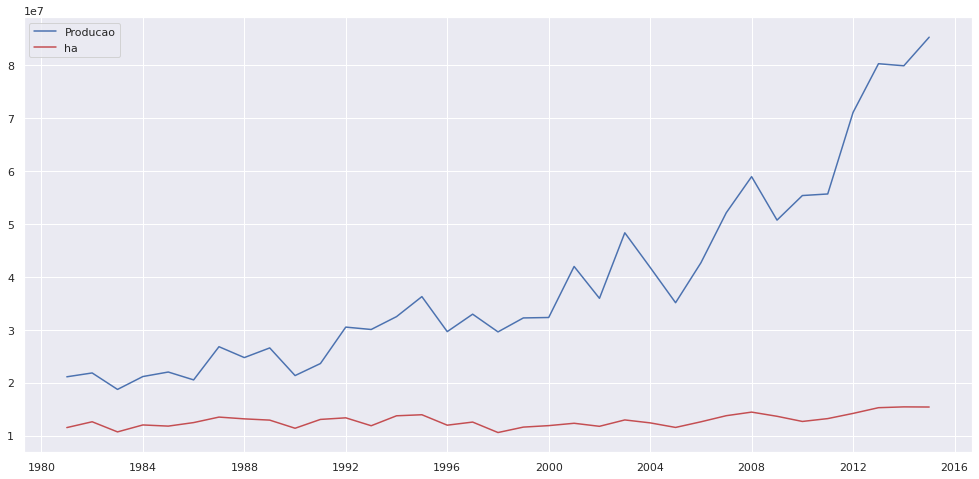

In [ ]:
milho = consulta_bc(1271)
a_milho = consulta_bc(1293)
milho = milho[milho.index >= '1900-01-01']
a_milho = a_milho[a_milho.index >= '1900-01-01']


fig, ax = plt.subplots()

ax.plot(milho, label= 'Producao')
ax.plot(a_milho, color='r', label = 'ha')
ax.legend()

In [ ]:
prod_ha_milho = milho/a_milho

prod_ha_milho.iplot()


In [ ]:
prod_ha_milho

,valor
data,
1981-01-01,1.833011
1982-01-01,1.730847
1983-01-01,1.749603
1984-01-01,1.760971
1985-01-01,1.866209
1986-01-01,1.646978
1987-01-01,1.984886
1988-01-01,1.879264
1989-01-01,2.054828


In [ ]:
prod_ha_milho['Producao/ha Soja'] = prod_ha_soja
prod_ha_milho.iplot()

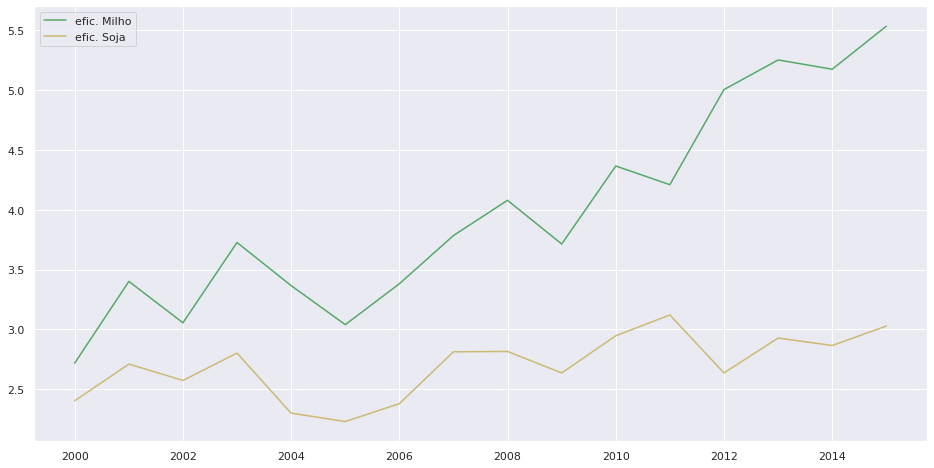

In [ ]:
fig, ax1 = plt.subplots()

ax1.plot(prod_ha_milho, color='g', label= 'efic. Milho')
ax1.plot(prod_ha_soja, color='y', label = 'efic. Soja')
plt.legend()

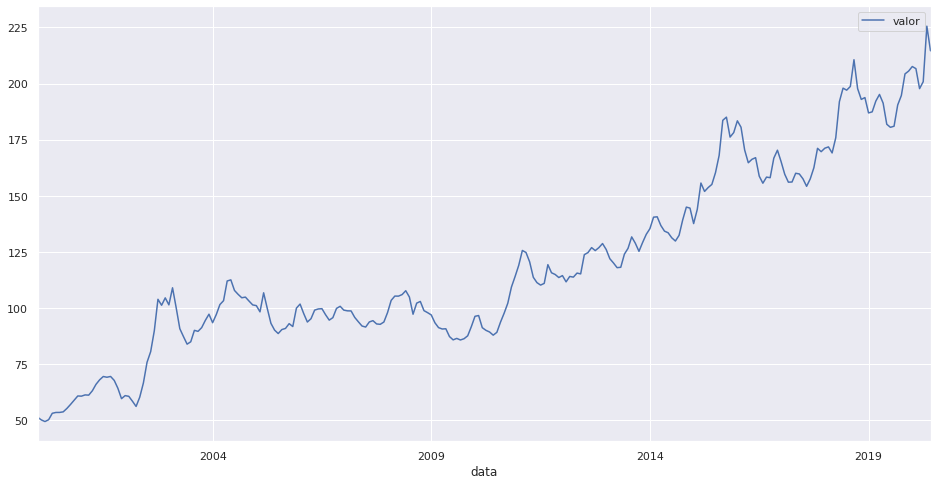

In [ ]:
comoditie_index = consulta_bc(27574)
comoditie_index = comoditie_index[comoditie_index.index >= '2000-01-01']
comoditie_index.plot()

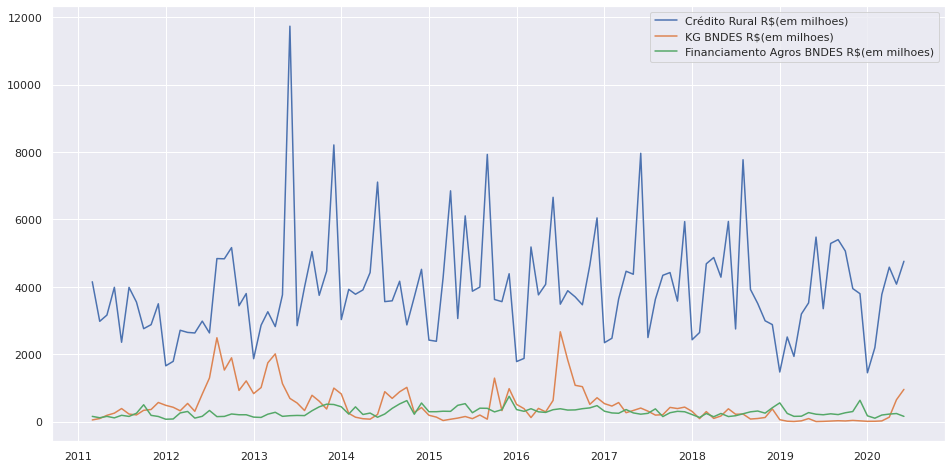

In [ ]:
credito_rural = consulta_bc(20689)
kg_bndes = consulta_bc(20693)
fin_agro_bndes = consulta_bc(20695)

fig, ax = plt.subplots()
ax.plot(credito_rural, label= 'Crédito Rural R$(em milhoes)')
ax.plot(kg_bndes, label= 'KG BNDES R$(em milhoes)')
ax.plot(fin_agro_bndes, label= 'Financiamento Agros BNDES R$(em milhoes)')

plt.legend()

In [ ]:
selic_meta = consulta_bc(1178)
selic_meta = selic_meta[selic_meta.index >= '2012-01-01']
spread_medio = consulta_bc(20784)
spread_medio = spread_medio[spread_medio.index >= '2012-01-01']
gp_demanda_esp = consulta_bc(21380)
gp_demanda_esp = gp_demanda_esp[gp_demanda_esp.index >= '2012-01-01']
gp_demanda_obs = consulta_bc(21381)
gp_demanda_obs = gp_demanda_obs[gp_demanda_obs.index >= '2012-01-01']

fig, ax1 = plt.subplots()
ax1.plot(selic_meta, label= 'Selic Meta')
ax1.plot(spread_medio, label= 'Spread Médio')
ax2 = ax1.twinx() # cria o segundo eixo
ax2.plot(gp_demanda_esp, color='g', label = 'PJ Grande Porte - Demanda Esperada')
ax2.plot(gp_demanda_obs, color='r', label = 'PJ Grande Porte - Demanda Observada')
ax1.legend()
ax2.legend()

![mapa-estado-parana-mesorregioes.png](attachment:mapa-estado-parana-mesorregioes.png)

![mapa-estado-santa-catarina-mesorregioes.png](attachment:mapa-estado-santa-catarina-mesorregioes.png)

![mapa-estado-rio-grande-do-sul-mesorregioes.png](attachment:mapa-estado-rio-grande-do-sul-mesorregioes.png)

# Milho Região Sul

* Dados obtidos do IBGE / Embrapa

In [ ]:
df = pd.read_csv('Milho.csv', decimal=",")
df

,Nome Lavoura,Ano,Sigla Região Geográfica IBGE,Sigla UF IBGE,Nome Mesorregião,Nome Microrregião,Nome Município IBGE,Área Colhida,Qtd.Produzida,Valor Produção (Moeda em Real)
0,Milho (em grão),1997,S,RS,Metropolitana de Porto Alegre,Gramado-Canela,Ivoti,0.20,0.600,85.000000
1,Milho (em grão),1992,S,RS,Noroeste Rio-grandense,Erechim,São Valentim,10.00,30.000,2.549656
2,Milho (em grão),2008,S,PR,Centro Ocidental Paranaense,Goioerê,Juranda,26.90,131.450,48242.000000
3,Milho (em grão),2016,S,RS,Nordeste Rio-grandense,Guaporé,Arvorezinha,2.60,13.000,9308.000000
4,Milho (em grão),2012,S,RS,Metropolitana de Porto Alegre,Camaquã,Dom Feliciano,6.00,10.800,4826.000000
...,...,...,...,...,...,...,...,...,...,...
34488,Milho (em grão),2008,S,PR,Noroeste Paranaense,Paranavaí,São Pedro do Paraná,0.18,0.390,133.000000
34489,Milho (em grão),2002,S,RS,Sudeste Rio-grandense,Jaguarão,Jaguarão,1.50,3.600,792.000000
34490,Milho (em grão),2015,S,RS,Nordeste Rio-grandense,Guaporé,Putinga,2.00,14.400,7671.000000
34491,Milho (em grão),2015,S,RS,Noroeste Rio-grandense,Erechim,Erval Grande,1.20,7.200,2664.000000


In [ ]:
df['Eficiencia'] = df['Qtd.Produzida']/df['Área Colhida']

In [ ]:
df

,Nome Lavoura,Ano,Sigla Região Geográfica IBGE,Sigla UF IBGE,Nome Mesorregião,Nome Microrregião,Nome Município IBGE,Área Colhida,Qtd.Produzida,Valor Produção (Moeda em Real),Eficiencia
0,Milho (em grão),1997,S,RS,Metropolitana de Porto Alegre,Gramado-Canela,Ivoti,0.20,0.600,85.000000,3.000000
1,Milho (em grão),1992,S,RS,Noroeste Rio-grandense,Erechim,São Valentim,10.00,30.000,2.549656,3.000000
2,Milho (em grão),2008,S,PR,Centro Ocidental Paranaense,Goioerê,Juranda,26.90,131.450,48242.000000,4.886617
3,Milho (em grão),2016,S,RS,Nordeste Rio-grandense,Guaporé,Arvorezinha,2.60,13.000,9308.000000,5.000000
4,Milho (em grão),2012,S,RS,Metropolitana de Porto Alegre,Camaquã,Dom Feliciano,6.00,10.800,4826.000000,1.800000
...,...,...,...,...,...,...,...,...,...,...,...
34488,Milho (em grão),2008,S,PR,Noroeste Paranaense,Paranavaí,São Pedro do Paraná,0.18,0.390,133.000000,2.166667
34489,Milho (em grão),2002,S,RS,Sudeste Rio-grandense,Jaguarão,Jaguarão,1.50,3.600,792.000000,2.400000
34490,Milho (em grão),2015,S,RS,Nordeste Rio-grandense,Guaporé,Putinga,2.00,14.400,7671.000000,7.200000
34491,Milho (em grão),2015,S,RS,Noroeste Rio-grandense,Erechim,Erval Grande,1.20,7.200,2664.000000,6.000000


In [ ]:
df1 = df.pivot_table(index='Ano', columns = 'Sigla UF IBGE', values = 'Eficiencia')
df1

Sigla UF IBGE,PR,RS,SC
Ano,,,
1990,2.558053,2.354058,2.506803
1991,2.072538,1.178566,1.910530
1992,2.464075,2.618068,2.837981
1993,2.696946,2.603882,2.886587
1994,3.091869,2.661798,2.974891
1995,3.045003,2.976858,3.092494
1996,3.055275,2.097191,2.818109
1997,3.096271,2.440721,3.297638
1998,3.295234,2.785673,3.219921


In [ ]:
df1.iplot()

In [ ]:
df2 = df.pivot_table(index='Ano', columns = 'Nome Mesorregião', values = 'Eficiencia')
df2

Nome Mesorregião,Centro Ocidental Paranaense,Centro Ocidental Rio-grandense,Centro Oriental Paranaense,Centro Oriental Rio-grandense,Centro-Sul Paranaense,Grande Florianópolis,Metropolitana de Curitiba,Metropolitana de Porto Alegre,Nordeste Rio-grandense,Noroeste Paranaense,...,Norte Pioneiro Paranaense,Oeste Catarinense,Oeste Paranaense,Serrana,Sudeste Paranaense,Sudeste Rio-grandense,Sudoeste Paranaense,Sudoeste Rio-grandense,Sul Catarinense,Vale do Itajaí
Ano,,,,,,,,,,,,,,,,,,,,,
1990,3.044021,2.094600,2.812452,2.564000,2.128171,2.593846,1.986902,1.725521,2.820895,2.112176,...,2.483542,2.766779,3.540927,2.050161,2.145414,1.341564,2.308410,1.823333,2.455902,2.281429
1991,2.464641,0.990029,2.484896,1.216859,1.622555,2.455929,1.659169,1.350428,1.192367,1.588812,...,2.329138,1.452687,2.707335,1.008163,1.345091,0.700211,1.615839,1.201667,2.651898,1.992827
1992,2.833170,2.268000,3.140312,2.654667,2.661831,2.767444,1.800187,1.983397,2.998460,1.632170,...,2.554692,3.059728,3.636120,2.205992,2.358421,1.647158,2.824849,1.650000,2.955439,2.655871
1993,3.146703,2.496800,3.481142,2.660670,2.702310,2.886784,2.101545,1.993358,3.110462,2.156158,...,2.606875,3.195493,3.547641,2.319685,2.408138,1.512500,2.802432,1.798667,2.703601,2.653586
1994,3.885426,2.143572,3.526740,2.752291,2.916888,2.865927,2.085177,2.051107,3.039106,2.737964,...,2.980148,3.262917,3.775158,2.448478,2.719726,1.906000,3.013773,1.717867,2.938580,2.619648
1995,3.641687,2.443594,3.734913,3.013245,3.007127,2.925000,2.101759,2.235111,3.422748,2.339072,...,2.861838,3.513749,3.712606,2.420435,2.793808,1.864392,3.343291,1.816667,3.128719,2.500302
1996,3.527775,1.896709,3.823683,2.256839,3.076772,2.289685,2.115870,1.829188,2.753481,2.737628,...,2.495734,3.091884,3.862359,2.332541,2.927926,1.450277,2.911309,1.611365,2.864472,2.693622
1997,3.231967,2.137289,3.948874,2.393642,3.367041,3.376190,2.070330,1.907452,2.931584,3.022607,...,2.333277,3.572428,3.524831,2.943931,3.362798,1.471734,3.188996,1.740786,2.953623,3.009728
1998,3.565123,2.414133,4.169372,2.882864,3.477278,3.371791,2.222868,1.977268,3.527400,2.692452,...,2.895605,3.354018,3.838404,3.118736,3.145078,1.735732,3.480574,1.664227,3.015575,3.075739


In [ ]:
df2.iplot()

In [ ]:
df3 = df.pivot_table(index='Ano', columns = 'Nome Microrregião', values = 'Eficiencia')
df3

Nome Microrregião,Apucarana,Araranguá,Assaí,Astorga,Blumenau,Cachoeira do Sul,Camaquã,Campanha Central,Campanha Meridional,Campanha Ocidental,...,Telêmaco Borba,Tijucas,Toledo,Três Passos,Tubarão,Umuarama,União da Vitória,Vacaria,Wenceslau Braz,Xanxerê
Ano,,,,,,,,,,,,,,,,,,,,,
1990,3.357736,2.207338,3.118944,2.601475,2.356000,2.440000,0.900000,2.200000,1.733333,1.680000,...,2.169831,2.510989,3.581261,2.418571,2.448423,2.247529,2.057552,2.043750,1.653047,2.763333
1991,3.046831,2.516343,2.669084,2.405141,2.242513,1.620000,0.806000,1.560000,1.266667,0.990000,...,1.781948,2.271703,2.552519,1.517500,2.554913,1.574731,1.286122,1.157765,1.900462,1.340113
1992,2.939754,2.693037,3.177715,1.868928,2.309180,2.460000,1.620000,1.573333,1.533333,1.746667,...,1.941383,2.571429,3.614611,2.558935,2.834118,2.048228,2.135714,2.112500,1.947698,3.144889
1993,3.541613,2.321168,3.060863,2.418266,2.356000,2.450000,1.388613,1.866667,1.650000,1.847500,...,2.906053,2.600000,3.407356,2.610206,2.879474,2.637594,2.188149,2.209973,2.221924,3.135357
1994,4.352476,2.743339,3.406639,3.298661,2.288778,2.383333,1.517143,1.766667,1.805000,1.656000,...,2.898023,2.388364,3.778008,2.694399,2.677368,2.765893,2.390832,2.470000,2.401513,3.472968
1995,4.539821,3.086624,3.244312,3.050845,2.336709,2.683333,1.607192,1.700000,1.462500,2.037500,...,3.232615,2.471429,3.689241,3.094438,2.824737,2.632791,2.554261,2.447982,2.364335,3.419214
1996,4.658761,2.778718,2.532871,3.104799,2.354192,1.575000,1.298571,1.800000,1.401724,1.645447,...,3.379355,2.795272,4.027430,1.880068,2.823118,3.124923,2.668976,2.465387,2.424372,3.191693
1997,4.555686,2.792857,2.092388,3.033385,2.562821,1.971429,1.212500,1.800000,0.946842,2.040600,...,3.285482,3.771429,3.349818,2.635917,2.819259,3.279700,2.764500,2.704660,2.587043,3.481056
1998,4.920099,2.781660,3.203309,3.342398,2.733168,2.485714,1.275000,1.191667,1.450000,1.891686,...,3.375277,3.729660,3.892854,2.676342,2.967273,2.879985,2.817001,2.981667,2.784212,3.648455


In [ ]:
df3.iplot()

# Soja Região Sul

* Dados obtidos do IBGE / Embrapa

In [ ]:
df4 = pd.read_csv('soja.csv', decimal=",")
df4

,Nome Lavoura,Ano,Sigla Região Geográfica IBGE,Sigla UF IBGE,Nome Mesorregião,Nome Microrregião,Nome Município IBGE,Área Colhida,Qtd.Produzida,Valor Produção (Moeda em Real)
0,Soja (em grão),1990,S,RS,Noroeste Rio-grandense,Erechim,Itatiba do Sul,3.15,4.41,0.014293
1,Soja (em grão),2006,S,PR,Norte Central Paranaense,Apucarana,Cambira,3.85,10.78,4096.000000
2,Soja (em grão),1994,S,PR,Sudoeste Paranaense,Francisco Beltrão,Renascença,14.00,37.80,6615.000000
3,Soja (em grão),2018,S,SC,Vale do Itajaí,Itajaí,Balneário Camboriú,NaN,NaN,NaN
4,Soja (em grão),1992,S,PR,Sudoeste Paranaense,Francisco Beltrão,Bom Jesus do Sul,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
34488,Soja (em grão),2006,S,RS,Sudeste Rio-grandense,Litoral Lagunar,Rio Grande,NaN,NaN,NaN
34489,Soja (em grão),1997,S,PR,Noroeste Paranaense,Paranavaí,Alto Paraná,NaN,NaN,NaN
34490,Soja (em grão),2000,S,RS,Sudoeste Rio-grandense,Campanha Meridional,Aceguá,NaN,NaN,NaN
34491,Soja (em grão),2003,S,PR,Metropolitana de Curitiba,Rio Negro,Tijucas do Sul,NaN,NaN,NaN


In [ ]:
df4['Eficiencia'] = df4['Qtd.Produzida']/df4['Área Colhida']

In [ ]:
df5 = df4.pivot_table(index='Ano', columns = 'Sigla UF IBGE', values = 'Eficiencia')
df5

Sigla UF IBGE,PR,RS,SC
Ano,,,
1990,1.957655,1.599284,1.453757
1991,1.732602,0.730306,0.941516
1992,1.811183,1.735125,1.641656
1993,2.210524,1.755453,1.670015
1994,2.384956,1.629947,1.702606
1995,2.454548,1.798862,1.804934
1996,2.564102,1.554407,1.914054
1997,2.530863,1.556275,1.953710
1998,2.391822,1.869304,1.879523


In [ ]:
df5.iplot()

In [ ]:
df6 = df4.pivot_table(index='Ano', columns = 'Nome Mesorregião', values = 'Eficiencia')
df6

Nome Mesorregião,Centro Ocidental Paranaense,Centro Ocidental Rio-grandense,Centro Oriental Paranaense,Centro Oriental Rio-grandense,Centro-Sul Paranaense,Grande Florianópolis,Metropolitana de Curitiba,Metropolitana de Porto Alegre,Nordeste Rio-grandense,Noroeste Paranaense,...,Norte Pioneiro Paranaense,Oeste Catarinense,Oeste Paranaense,Serrana,Sudeste Paranaense,Sudeste Rio-grandense,Sudoeste Paranaense,Sudoeste Rio-grandense,Sul Catarinense,Vale do Itajaí
Ano,,,,,,,,,,,,,,,,,,,,,
1990,2.073958,1.598000,1.929091,1.509222,2.015912,NaN,1.971889,1.176985,1.651937,1.994415,...,1.787781,1.254220,2.136850,1.838182,1.912286,1.218889,1.879858,1.526364,1.900000,2.047076
1991,1.853241,0.804652,2.149999,0.779092,1.696000,NaN,1.921429,1.031967,0.773925,1.773584,...,1.807625,0.705588,1.708475,1.058788,1.830082,0.738824,1.032790,0.905455,1.900000,1.866667
1992,1.733648,1.615000,2.435000,1.634556,2.115000,NaN,1.909291,1.223144,1.686782,1.200011,...,1.706965,1.497688,1.817536,1.932532,2.153660,1.550667,2.082332,1.283425,1.900000,1.666667
1993,2.279118,1.758000,2.622283,1.572406,2.344250,NaN,2.275000,1.332585,1.681551,2.002283,...,2.075383,1.534492,2.185381,1.983077,2.316320,1.401250,2.239706,1.392308,1.540000,1.911111
1994,2.497998,1.576000,2.613635,1.508214,2.388363,NaN,2.186667,1.304943,1.657738,2.435215,...,2.193024,1.559705,2.310442,2.089231,2.425514,1.618393,2.240882,1.340769,1.800000,1.900000
1995,2.649687,1.822800,2.683333,1.659908,2.529490,NaN,2.241893,1.502326,1.743021,2.131619,...,2.257756,1.660330,2.492466,2.190769,2.638131,1.639790,2.575002,1.574286,1.800000,2.000000
1996,2.642916,1.492027,2.641667,1.478082,2.557208,1.714286,2.245758,1.452427,1.517314,2.429331,...,2.206688,1.817580,2.722288,2.011308,2.545165,1.342874,2.656210,1.392631,1.359848,2.031746
1997,2.564257,1.653360,2.569928,1.574819,2.438398,1.800000,2.207350,1.421476,1.579719,2.529695,...,2.223292,1.859212,2.686724,1.961799,2.671662,1.431244,2.625074,1.539952,NaN,2.750000
1998,2.627936,1.839319,2.712748,1.891274,2.569271,NaN,2.250401,1.491923,1.787549,2.030511,...,1.847558,1.763737,2.634140,2.020383,2.527439,1.552353,2.559643,1.442000,NaN,2.593333


In [ ]:
df6.iplot()